In [11]:
import pandas as pd

In [12]:
wichita = pd.read_csv("https://datajournalism.tech/wp-content/uploads/2019/10/wichita.csv")

In [13]:
four = wichita[wichita.subject_race != "other/unknown"]

In [14]:
population = pd.DataFrame ({"subject_race": ["white", "black", "asian/pacific islander", "hispanic"], "num_people": [246343, 42679, 19272, 63659]},
             columns = ["subject_race", "num_people"])

In [15]:
stops = pd.merge(four, population, on="subject_race")

In [16]:
stops.head()

,Unnamed: 0,raw_row_number,date,time,location,lat,lng,subject_age,subject_race,subject_sex,...,citation_issued,outcome,posted_speed,vehicle_color,vehicle_make,vehicle_model,vehicle_year,raw_defendant_race,raw_defendant_ethnicity,num_people
0,1,923578,2016-01-01,18:00:00,"N WEST ST, KS, 67205",37.741425,-97.389764,16.0,white,female,...,True,citation,NaN,BURGUNDY OR MAROON,JEEP (1989 TO PRESENT),NaN,2008.0,W,N,246343
1,2,923657,2016-01-01,18:08:00,"8000 W 13TH ST N, WICHITA, KS, 67212",37.708795,-97.440594,44.0,white,male,...,True,citation,40.0,"""ALUMINUM, SILVER""",HYUNDAI,TUCSON,NaN,W,N,246343
2,3,912091,2016-01-01,18:11:00,"500 S LIMUEL ST, WICHITA, KS, 67235",37.674821,-97.489990,20.0,white,male,...,True,citation,NaN,WHITE,HONDA,NaN,NaN,W,N,246343
3,6,923676,2016-01-01,18:44:00,"7600 W 21ST ST N, WICHITA, KS, 67205",37.724018,-97.431369,27.0,white,male,...,True,citation,40.0,GRAY,DODGE,NEON,NaN,W,N,246343
4,12,923684,2016-01-01,22:45:00,"W CENTRAL AVE, KS, 67203",37.694806,-97.370597,20.0,white,female,...,True,citation,NaN,GRAY,PONTIAC,GRAND PRIX,NaN,W,N,246343


In [17]:
race = four.subject_race.value_counts() .reset_index()

In [18]:
race = race.rename(columns={"index": "subject_race", "subject_race": "count"})


In [19]:
stops = pd.merge(race, population, on="subject_race")

In [20]:
stops

,subject_race,count,num_people
0,white,32061,246343
1,black,8038,42679
2,hispanic,6709,63659
3,asian/pacific islander,1607,19272


In [21]:
race.head()

,subject_race,count
0,white,32061
1,black,8038
2,hispanic,6709
3,asian/pacific islander,1607


In [22]:
population.head()

,subject_race,num_people
0,white,246343
1,black,42679
2,asian/pacific islander,19272
3,hispanic,63659


In [23]:
stops

,subject_race,count,num_people
0,white,32061,246343
1,black,8038,42679
2,hispanic,6709,63659
3,asian/pacific islander,1607,19272


In [24]:
stops["stop_rate"] = stops["count"]/stops["num_people"]

In [25]:
stops 

,subject_race,count,num_people,stop_rate
0,white,32061,246343,0.130148
1,black,8038,42679,0.188336
2,hispanic,6709,63659,0.105390
3,asian/pacific islander,1607,19272,0.083385


In [26]:
%matplotlib inline

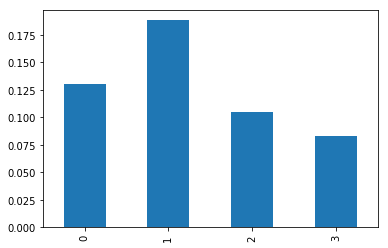

In [29]:
stops.stop_rate.plot.bar()

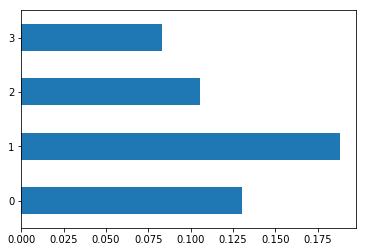

In [33]:
chart = stops.stop_rate.plot.barh()

In [42]:
stops.to_csv("stops.csv")

In [44]:
stops.drop(["num_people", "count"], axis=1)

,subject_race,stop_rate
0,white,0.130148
1,black,0.188336
2,hispanic,0.105390
3,asian/pacific islander,0.083385


In [45]:
stops.to_csv("stops.csv")